<a href="https://colab.research.google.com/github/sayandeepmaity/vseven_lumi/blob/main/distance_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Root Mean Squared Error (RMSE): 40.25 meters


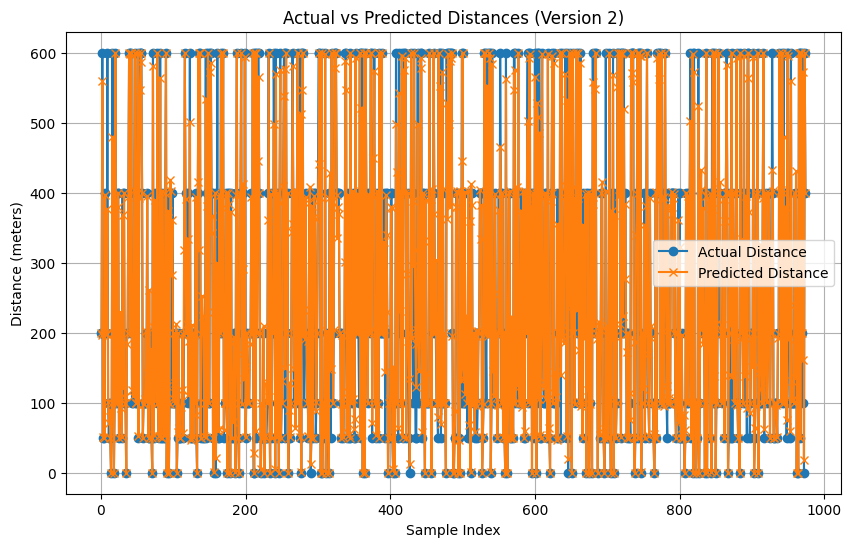

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


SPEED_OF_SOUND = 343


path = '/content/drive/MyDrive/sevenlumi_data/data_to_fed/cleaned_features.csv'
df = pd.read_csv(path)


df = df.drop(['Gun_Type', 'Gunshot'], axis=1)


df['Distance'] = df['Distance'].str.replace('m', '').astype(float)


df['Effective_Distance'] = (df['Arrival_Time_Difference'] * 0.001) * SPEED_OF_SOUND


df = df.drop('Mic', axis=1)


X = df.drop('Distance', axis=1)
y = df['Distance']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} meters")


plt.figure(figsize=(10,6))
plt.plot(list(range(len(y_test))), y_test.values, marker='o', label='Actual Distance')
plt.plot(list(range(len(y_pred))), y_pred, marker='x', label='Predicted Distance')
plt.xlabel('Sample Index')
plt.ylabel('Distance (meters)')
plt.title('Actual vs Predicted Distances (Version 2)')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
pip install joblib


In [ ]:
import joblib


joblib.dump(model, '/content/drive/MyDrive/sevenlumi_data/models/gunshot_distance_model.joblib')

